<a href="https://colab.research.google.com/github/levongocanh/DoAnCS232/blob/master/detection_facemask_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from sklearn.svm import LinearSVC
from keras.preprocessing.image import load_img
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array
from google.colab import files
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Cài đặt face_recognition
# https://pypi.org/project/face-recognition/
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a55da65ae91bc1dc16cbe9fc64d1f84036f083056aeef6a214807527a1c0a2e8
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
# Load model đã train
trained_model = joblib.load('/content/drive/My Drive/Dataset/facemask_detector.pkl')
# Load pre-trained model VGG 16 của ImageNet dataset để trích xuất features ảnh, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


Saving 1.jpg to 1.jpg
Saving 5_8_Chu_tich_TP_Hai_Phong_nhac_nho_nguvov_oi_dan_khong_deo_khau_trang_tai_khu_vuc_truoc_cong_BV_OTWS.jpg to 5_8_Chu_tich_TP_Hai_Phong_nhac_nho_nguvov_oi_dan_khong_deo_khau_trang_tai_khu_vuc_truoc_cong_BV_OTWS.jpg
Saving 5d572e42_e602_4040_8191_413c27eca72f_fbkh.jpeg to 5d572e42_e602_4040_8191_413c27eca72f_fbkh.jpeg
Saving 94483356_3040073862682031_6877003167934971904_o_dcbr.jpg to 94483356_3040073862682031_6877003167934971904_o_dcbr.jpg
Saving deo-khau-trang-an-do-14720.jpg to deo-khau-trang-an-do-14720.jpg
Saving e1b2e5618ab918218bf3ff8b3911ffea.jpg to e1b2e5618ab918218bf3ff8b3911ffea.jpg
Saving images.jpg to images.jpg
Saving images5398355_coop.jpg to images5398355_coop.jpg
Saving Nguoi-dan-Thu-do-bat-ngo-khi-tap-the-duc-cung-1-1557284010-399-width800height559.jpeg to Nguoi-dan-Thu-do-bat-ngo-khi-tap-the-duc-cung-1-1557284010-399-width800height559.jpeg
Saving Trump_deo_khau_trang.jpg to Trump_deo_khau_trang.jpg
Saving unnamed (1).jpg to unnamed (1).jpg
Im

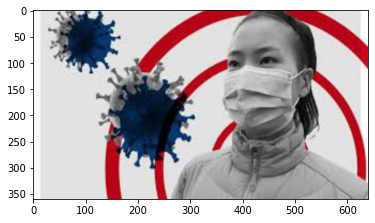

Output:


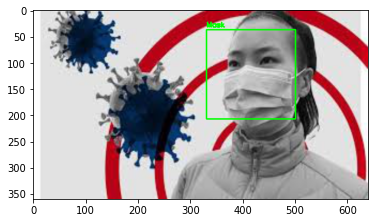

Image 2
Input:


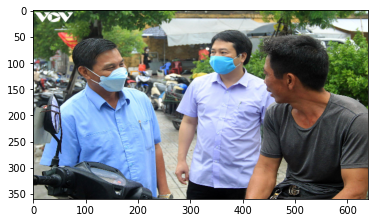

Output:


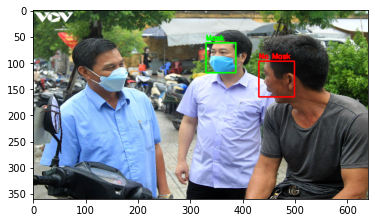

Image 3
Input:


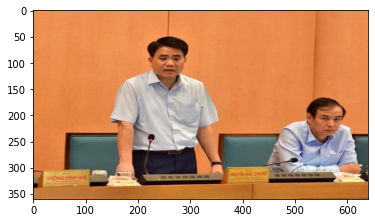

Output:


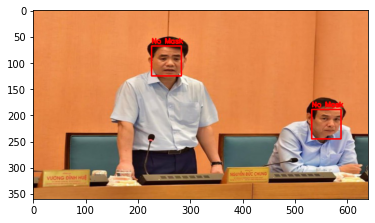

Image 4
Input:


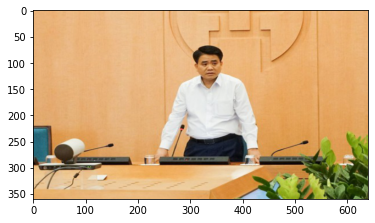

Output:


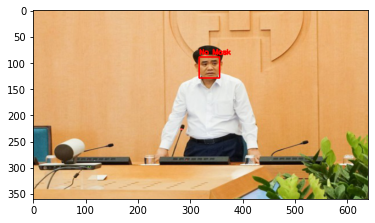

Image 5
Input:


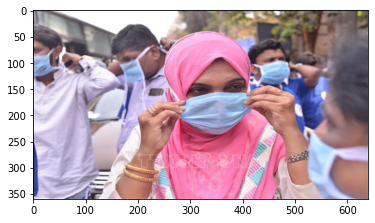

Output:


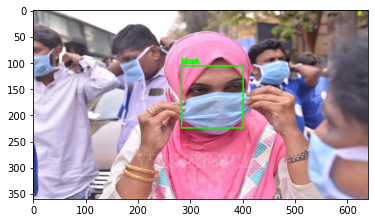

Image 6
Input:


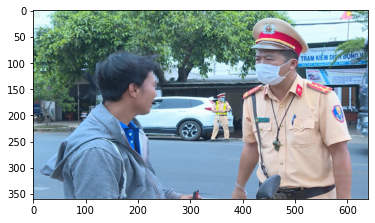

Output:


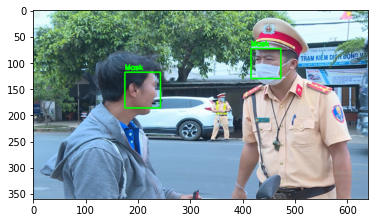

Image 7
Input:


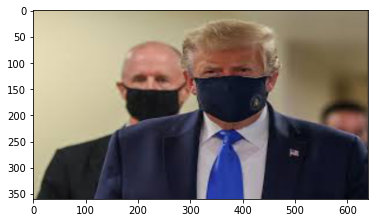

Output:


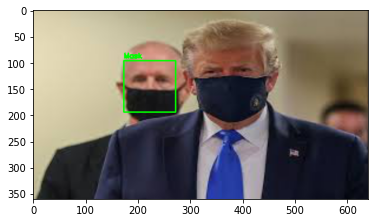

Image 8
Input:


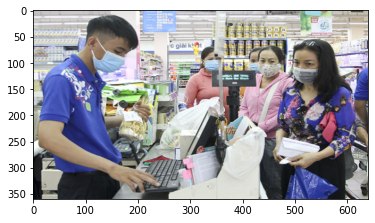

Output:


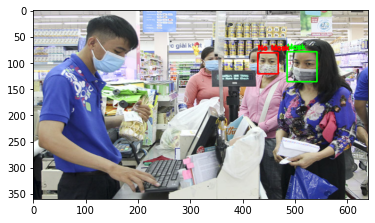

Image 9
Input:


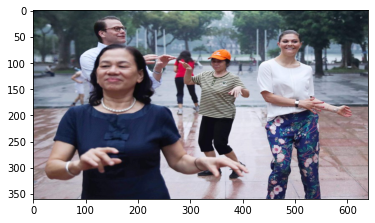

Output:


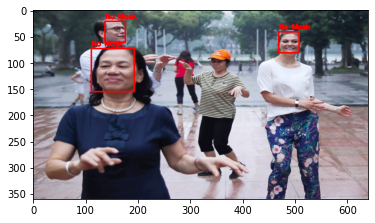

Image 10
Input:


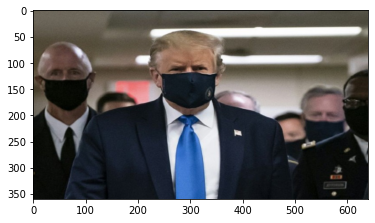

Output:


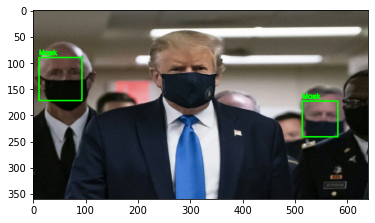

Image 11
Input:


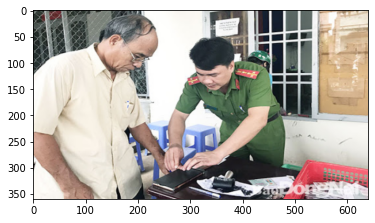

Output:


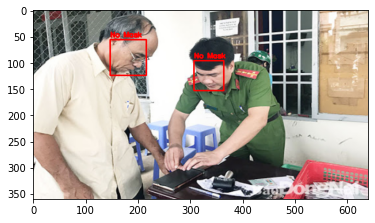

In [5]:
uploaded = files.upload()

for (i, fn) in enumerate(uploaded.keys()):
  print("Image", i+1, ":")
  path = '/content/' + fn 
  image = mpimg.imread(path)
  image = cv2.resize(image, (640, 360))
  print("Input:")
  plt.imshow(image)
  plt.show()
  #Sử dụng face_locations của module face_recognition để lấy vị trí của khuôn mặt có trong ảnh
  face_locations = face_recognition.face_locations(image, model="cnn")
  for face_location in face_locations:
    top, right, bottom, left = face_location
    frame_predict = image[top:bottom, left:right]
    frame_predict = cv2.resize(frame_predict, (224, 224))
    frame_predict = np.expand_dims(frame_predict, 0)
    frame_predict = np.vstack([frame_predict])
    features = model.predict(frame_predict)
    features = features.reshape((features.shape[0], 512*7*7))
    result = trained_model.predict(features)
    if result[0]==1:
      label = "Mask"
      color = (0, 255, 0)
    else:
      label = "No Mask"
      color = (255, 0, 0)
    # In label
    cv2.putText(image, label, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    # Đóng khung khuôn mặt
    cv2.rectangle(image, (left, top), (right, bottom), color, 2)
  print("Output:")
  plt.imshow(image)
  plt.show()